# emotion detector

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.3.1'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset3/train',
                                                 target_size = (48, 48),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 17084 images belonging to 3 classes.


### Preprocessing the Test set

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset3/validation',
                                            target_size = (48, 48),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4180 images belonging to 3 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [5]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[48, 48, 3]))

### Step 2 - Pooling

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a third convolutional Layer

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [10]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [11]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [12]:
cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))

## Part 3 - Training the CNN

### Compiling the CNN

In [13]:
from keras.optimizers import SGD
opt = SGD(lr=0.01, momentum=0.9)
cnn.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [14]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 100)

Epoch 1/100
534/534 [==============================] - 179s 335ms/step - loss: 1.0523 - accuracy: 0.4517 - val_loss: 0.9646 - val_accuracy: 0.5311
Epoch 2/100
534/534 [==============================] - 38s 71ms/step - loss: 0.9348 - accuracy: 0.5532 - val_loss: 0.8521 - val_accuracy: 0.6007
Epoch 3/100
534/534 [==============================] - 39s 72ms/step - loss: 0.8714 - accuracy: 0.5896 - val_loss: 0.7975 - val_accuracy: 0.6349
Epoch 4/100
534/534 [==============================] - 38s 71ms/step - loss: 0.8343 - accuracy: 0.6019 - val_loss: 0.7556 - val_accuracy: 0.6560
Epoch 5/100
534/534 [==============================] - 38s 71ms/step - loss: 0.7936 - accuracy: 0.6287 - val_loss: 0.7415 - val_accuracy: 0.6581
Epoch 6/100
534/534 [==============================] - 38s 70ms/step - loss: 0.7662 - accuracy: 0.6431 - val_loss: 0.7144 - val_accuracy: 0.6742
Epoch 7/100
534/534 [==============================] - 37s 70ms/step - loss: 0.7452 - accuracy: 0.6546 - val_loss: 0.7400 - val_

## Part 4 - Making a single prediction

In [15]:
training_set.class_indices

{'happy': 0, 'neutral': 1, 'sad': 2}

In [29]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset3\single_prediction\Adam_Rich_0001.jpg', target_size = (48, 48))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

if result[0][0] == 1:
  prediction = 'neutral'
elif result[0][0] == 2:
  prediction = 'sad'
else:
  prediction = 'happy'

In [30]:
print(prediction)

happy


In [22]:
cnn.save('model.hdf5')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


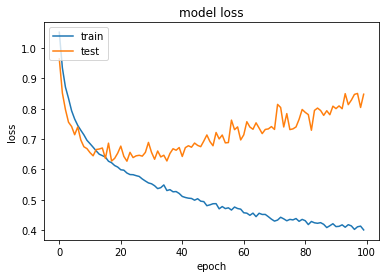

In [26]:
print(history.history.keys())

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()